In [179]:
# Machine learning classification libraries
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [180]:
AAPL_data = pd.read_csv('./rsc/AAPL_data.csv')
AAPL_data = AAPL_data.dropna()

In [181]:
# +1 means buy -1 means hold
# use this to evalute whether the algorithm can tell whether to buy or hold
y = np.where(AAPL_data['close'].shift(-1) > AAPL_data['close'],1,-1)
print(y[0:10])

[ 1  1  1  1 -1  1  1  1  1  1]


In [182]:
print(AAPL_data.columns[1:len(AAPL_data)])

Index(['20_day_sma', 'close', 'ewma_12', 'ewma_26', 'high', 'low', 'obv_10',
       'open', 'rsi_14', 'volume'],
      dtype='object')


In [183]:
# X dataset contains predictor variables to predict target variable y
# 
AAPL_data['Open-Close'] = AAPL_data.open - AAPL_data.close
AAPL_data['High-Low'] = AAPL_data.high - AAPL_data.low
 
X=AAPL_data[AAPL_data.columns[1:]]

In [184]:
split_percentage = 0.8
split = int(split_percentage*len(AAPL_data))

# Train data set
X_train = X[:split]
y_train = y[:split]
 
# Test data set
X_test = X[split:]
y_test = y[split:]

In [185]:
cls = SVC().fit(X_train, y_train)

In [186]:
# compare accuracy by comparing actual values of trading signal with predicted values of trading signal
#
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
 
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 52.78%


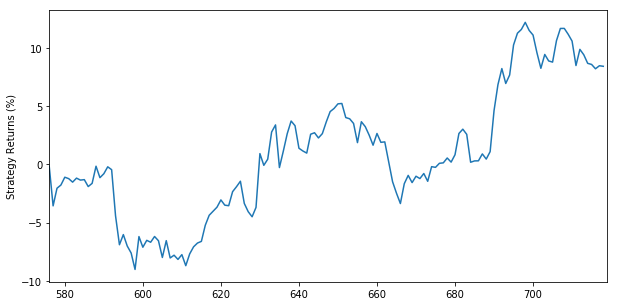

In [187]:
# predict the buy/sell signals of the test dataset
# evalute against the model in the train dataset in the next day
AAPL_data['Predicted_Signal'] = cls.predict(X)
 
# Calculate log returns
AAPL_data['Return'] = np.log(AAPL_data.close.shift(-1) / AAPL_data.close)*100
AAPL_data['Strategy_Return'] = AAPL_data.Return * AAPL_data.Predicted_Signal
AAPL_data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [188]:
AAPL_data

,date,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
0,2015-01-30,110.64150,117.160,113.100715,111.782535,120.0000,116.8500,36869040.5,118.400,91.43,83745461.0,1.240,3.1500,1,1.246888,1.246888
1,2015-02-02,111.10650,118.630,113.977641,112.415496,119.1700,116.0800,37070624.7,118.050,92.46,62739100.0,-0.580,3.0900,1,0.016858,0.016858
2,2015-02-03,111.72650,118.650,114.715157,112.981405,119.0900,117.6100,39228009.3,118.500,88.13,51915749.0,-0.150,1.4800,1,0.764035,0.764035
3,2015-02-04,112.39150,119.560,115.476853,113.568741,120.5100,118.3090,38072992.9,118.500,72.85,70149743.0,-1.060,2.2010,1,0.317328,0.317328
4,2015-02-05,113.00100,119.940,116.176181,114.129045,120.2300,119.2500,29055853.4,120.020,74.42,42246245.0,0.080,0.9800,-1,-0.845653,0.845653
5,2015-02-06,113.35300,118.930,116.606452,114.545478,120.2500,118.4500,27383335.2,120.020,71.28,43706567.0,1.090,1.8000,1,0.662060,0.662060
6,2015-02-09,113.73850,119.720,117.091764,114.988701,119.8400,118.4300,43141060.7,118.550,71.08,38889797.0,-1.170,1.4100,1,1.902928,1.902928
7,2015-02-10,114.37700,122.020,117.858382,115.584070,122.1500,120.1600,35849534.1,120.170,68.17,62008506.0,-1.850,1.9900,1,2.316831,2.316831
8,2015-02-11,115.11000,124.880,118.948774,116.362939,124.9200,122.5000,34853337.5,122.770,60.08,73561797.0,-2.110,2.4200,1,1.257278,1.257278
9,2015-02-12,115.94300,126.460,120.113515,117.200794,127.4800,125.5700,48655105.5,126.060,49.87,74474466.0,-0.400,1.9100,1,0.489076,0.489076


In [189]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [190]:
def classification_model(model, data, predictors, outcome):
    # fit the model
    model.fit(data[predictors], outcome)
    
    # Make predictions on the training set
    predictions = model.predict(data[predictors])
    
    # Print accuracy
    accuracy = accuracy_score(predictions, outcome)
    print("Accuracy : %s" % "{0:.2%}".format(accuracy))
    
    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(outcome):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])

        # The target we're using to train the algorithm.
        train_target = outcome[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test, :], outcome[test]))

        print("Cross-Validation Score : %s" % "{0:.2%}".format(np.mean(error)))

    # Fit the model again so that it can be referred outside the function:
    model.fit(data[predictors], outcome)

    

In [191]:
AAPL_data = pd.read_csv('./rsc/AAPL_data.csv')
AAPL_data = AAPL_data.dropna()

In [192]:
# Random Forest Classifier all features
# Use all the features of the nucleus

predictor_var = AAPL_data.columns[1:len(AAPL_data)]
outcome_var = y
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, AAPL_data, predictor_var, outcome_var)

Accuracy : 76.39%
Cross-Validation Score : 61.81%
Cross-Validation Score : 62.50%
Cross-Validation Score : 63.19%
Cross-Validation Score : 63.19%
Cross-Validation Score : 62.64%


In [193]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

obv_10        0.243310
rsi_14        0.214931
volume        0.098911
ewma_26       0.075358
high          0.064770
low           0.063313
close         0.062628
ewma_12       0.060111
20_day_sma    0.059823
open          0.056845
dtype: float64


In [194]:
print(AAPL_data.index.dtype)

int64


In [195]:
# predict the buy/sell signals of the test dataset
# evaluate against the model in the train dataset
AAPL_data['Predicted_Signal'] = model.predict(AAPL_data[predictor_var])

# Calculate log returns
AAPL_data['Return'] = np.log(AAPL_data.close.shift(-1) / AAPL_data.close)*100
AAPL_data['Strategy_Return'] = AAPL_data.Return * AAPL_data.Predicted_Signal

AAPL_data.set_index('date',inplace=True)

In [196]:
AAPL_data.head()

,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Predicted_Signal,Return,Strategy_Return
date,,,,,,,,,,,,,
2015-01-30,110.6415,117.16,113.100715,111.782535,120.00,116.850,36869040.5,118.40,91.43,83745461.0,1,1.246888,1.246888
2015-02-02,111.1065,118.63,113.977641,112.415496,119.17,116.080,37070624.7,118.05,92.46,62739100.0,1,0.016858,0.016858
2015-02-03,111.7265,118.65,114.715157,112.981405,119.09,117.610,39228009.3,118.50,88.13,51915749.0,1,0.764035,0.764035
2015-02-04,112.3915,119.56,115.476853,113.568741,120.51,118.309,38072992.9,118.50,72.85,70149743.0,1,0.317328,0.317328
2015-02-05,113.0010,119.94,116.176181,114.129045,120.23,119.250,29055853.4,120.02,74.42,42246245.0,1,-0.845653,-0.845653


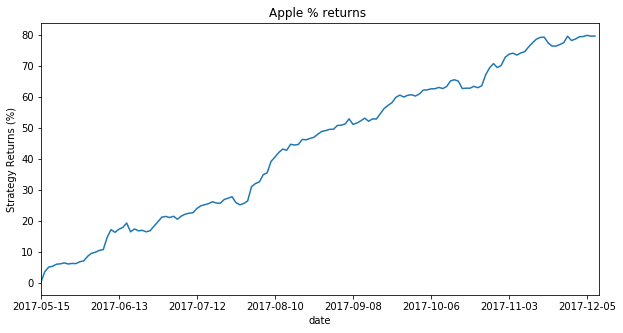

In [197]:
AAPL_data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.title('Apple % returns ')
plt.show()

In [198]:
# import functions needed for GBM model
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn import metrics


In [199]:
def model_fit(alg, dtrain, predictors, outcome, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Fit algorithm on the data
    alg.fit(dtrain[predictors], outcome)
    
    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # Perform Cross-validation
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], y = outcome, cv=cv_folds, scoring = 'roc_auc')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y[0:len(y)], dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
            
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
            
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')



Model Report
Accuracy : 0.8986
AUC Score (Train): 0.959619
CV Score : Mean - 0.6617226 | Std - 0.03740055 | Min - 0.5897683 | Max - 0.6939189


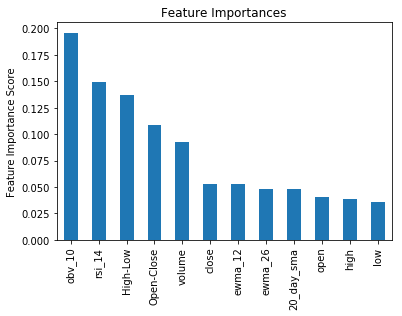

In [200]:
AAPL_data = pd.read_csv('./rsc/AAPL_data.csv')
AAPL_data = AAPL_data.dropna()
AAPL_data['Open-Close'] = AAPL_data.open - AAPL_data.close
AAPL_data['High-Low'] = AAPL_data.high - AAPL_data.low
# +1 means buy -1 means hold
# use this to evalute whether the algorithm can tell whether to buy or hold
y = np.where(AAPL_data['close'].shift(-1) > AAPL_data['close'],1,-1)

# Choose predictors
predictors = AAPL_data.columns[1:len(AAPL_data)]
gbm0 = GradientBoostingClassifier(random_state=10)
model_fit(gbm0, AAPL_data, predictors, y)


In [201]:
# initialize all default parameter values
min_samples_split = int(0.01 * len(AAPL_data['date']))
min_samples_leaf = 2
max_depth = 5
max_features = 'sqrt'
subsample = 0.8
random_state = 10

#Choose all predictors except target & IDcols
predictors = AAPL_data.columns[1:len(AAPL_data)]
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_depth=max_depth,max_features=max_features,subsample=subsample,random_state=random_state), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(AAPL_data[AAPL_data.columns[1:len(AAPL_data)]],y)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.64277, std: 0.06859, params: {'n_estimators': 20},
  mean: 0.64842, std: 0.05570, params: {'n_estimators': 30},
  mean: 0.64931, std: 0.05398, params: {'n_estimators': 40},
  mean: 0.65064, std: 0.05216, params: {'n_estimators': 50},
  mean: 0.65261, std: 0.05455, params: {'n_estimators': 60},
  mean: 0.64949, std: 0.05309, params: {'n_estimators': 70},
  mean: 0.64760, std: 0.05350, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.6526125678473506)

In [202]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split': list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features=max_features, subsample=subsample, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(AAPL_data[AAPL_data.columns[1:len(AAPL_data)]],y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.67026, std: 0.06103, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.68071, std: 0.04563, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.66849, std: 0.06051, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.68088, std: 0.04565, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.66935, std: 0.05016, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.68088, std: 0.04565, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [203]:
# here we see that the best max_depth sees to be 7 
# best min_samples_leaf seems to be best at 30
# min_samples_split seems to be good at 420
max_depth = 7

In [204]:
param_test3 = {'min_samples_split':list(range(300,500,20)), 'min_samples_leaf':list(range(10,80,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=max_depth,max_features=max_features, subsample=subsample, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(AAPL_data[AAPL_data.columns[1:len(AAPL_data)]],y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.67078, std: 0.05921, params: {'min_samples_leaf': 10, 'min_samples_split': 300},
  mean: 0.67185, std: 0.05958, params: {'min_samples_leaf': 10, 'min_samples_split': 320},
  mean: 0.67367, std: 0.05576, params: {'min_samples_leaf': 10, 'min_samples_split': 340},
  mean: 0.67514, std: 0.05643, params: {'min_samples_leaf': 10, 'min_samples_split': 360},
  mean: 0.67939, std: 0.05547, params: {'min_samples_leaf': 10, 'min_samples_split': 380},
  mean: 0.68308, std: 0.05073, params: {'min_samples_leaf': 10, 'min_samples_split': 400},
  mean: 0.68550, std: 0.04849, params: {'min_samples_leaf': 10, 'min_samples_split': 420},
  mean: 0.68447, std: 0.04887, params: {'min_samples_leaf': 10, 'min_samples_split': 440},
  mean: 0.68215, std: 0.05428, params: {'min_samples_leaf': 10, 'min_samples_split': 460},
  mean: 0.50000, std: 0.00000, params: {'min_samples_leaf': 10, 'min_samples_split': 480},
  mean: 0.67342, std: 0.04933, params: {'min_samples_leaf': 20, 'min_samples_split': 300},

In [205]:
print(len(AAPL_data.columns[1:]))

12


In [206]:
min_samples_leaf = 30
min_samples_split = 420

param_test4 = {'max_features':list(range(1,len(AAPL_data.columns[1:]),2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, subsample=subsample, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(AAPL_data[AAPL_data.columns[1:len(AAPL_data)]],y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.63184, std: 0.06148, params: {'max_features': 1},
  mean: 0.68685, std: 0.05328, params: {'max_features': 3},
  mean: 0.69005, std: 0.05927, params: {'max_features': 5},
  mean: 0.68779, std: 0.05016, params: {'max_features': 7},
  mean: 0.69788, std: 0.05214, params: {'max_features': 9},
  mean: 0.69795, std: 0.05032, params: {'max_features': 11}],
 {'max_features': 11},
 0.6979486654356221)

In [207]:
parameter_dict = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'subsample': subsample,
    'random_state': random_state,
    'max_features': 11
}

for param in parameter_dict:
    print(parameter_dict[param])

7
420
30
0.8
10
11



Model Report
Accuracy : 0.7236
AUC Score (Train): 0.792387
CV Score : Mean - 0.6979487 | Std - 0.05031661 | Min - 0.6165058 | Max - 0.7483591


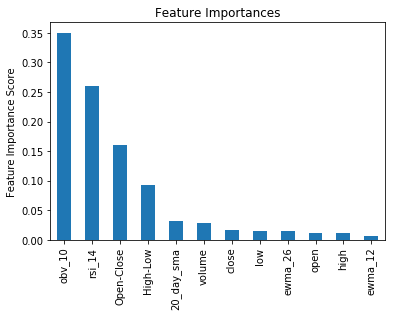

In [208]:
# New training parameters after tuning 
# min_samples_leaf = 30
# min_samples_split = 420
# max_features = 11
# max_depth = 7
# subsample = 0.8
# random_state = 10

AAPL_data = pd.read_csv('./rsc/AAPL_data.csv')
AAPL_data = AAPL_data.dropna()
AAPL_data['Open-Close'] = AAPL_data.open - AAPL_data.close
AAPL_data['High-Low'] = AAPL_data.high - AAPL_data.low
# +1 means buy -1 means hold
# use this to evalute whether the algorithm can tell whether to buy or hold
y = np.where(AAPL_data['close'].shift(-1) > AAPL_data['close'],1,-1)

# Choose predictors
predictors = AAPL_data.columns[1:len(AAPL_data)]
gbm0 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=parameter_dict['max_depth'],min_samples_split=parameter_dict['min_samples_split'], min_samples_leaf= parameter_dict['min_samples_leaf'], subsample=parameter_dict['subsample'], random_state=parameter_dict['random_state'],max_features=parameter_dict['max_features'])
model_fit(gbm0, AAPL_data, predictors, y)


In [211]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

AAPL_data = pd.read_csv('./rsc/AAPL_data.csv')
AAPL_data = AAPL_data.dropna()
y = np.where(AAPL_data['close'].shift(-1) > AAPL_data['close'],1,-1)

In [212]:
columns = AAPL_data.columns[1:]
print(columns)

Index(['20_day_sma', 'close', 'ewma_12', 'ewma_26', 'high', 'low', 'obv_10',
       'open', 'rsi_14', 'volume'],
      dtype='object')


In [213]:
AAPL_data['Open-Close'] = AAPL_data.open - AAPL_data.close
AAPL_data['High-Low'] = AAPL_data.high - AAPL_data.low
 
X = AAPL_data[AAPL_data.columns[1:]]

In [214]:
split_percentage = 0.8
split = int(split_percentage*len(AAPL_data))

# Train data set
X_train = X[:split]
y_train = y[:split]
 
# Test data set
X_test = X[split:]
y_test = y[split:]

In [215]:
X_train[columns].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            566, 567, 568, 569, 570, 571, 572, 573, 574, 575],
           dtype='int64', length=576)

In [216]:
gbm = xgb.XGBClassifier(max_depth = 7, n_estimators=275, learning_rate = 0.1).fit(X_train, y_train)
predictions = gbm.predict(X_test)

print(len(predictions))

144


/Users/arthur/Library/Python/3.6/lib/python/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [217]:
# compare accuracy by comparing actual values of trading signal with predicted values of trading signal
accuracy_train = accuracy_score(y_train, gbm.predict(X_train))
 
accuracy_test = accuracy_score(y_test, predictions)
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 63.19%


/Users/arthur/Library/Python/3.6/lib/python/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [218]:
AAPL_data.set_index('date', inplace = True)

/Users/arthur/Library/Python/3.6/lib/python/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


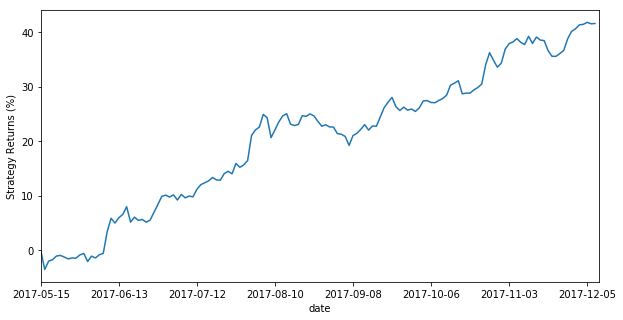

In [219]:
AAPL_data['Predicted_Signal'] = gbm.predict(X)
# Calculate log returns
AAPL_data['Return'] = np.log(AAPL_data.close.shift(-1) / AAPL_data.close)*100
AAPL_data['Strategy_Return'] = AAPL_data.Return[split:] * AAPL_data['Predicted_Signal']
AAPL_data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [220]:
AAPL_data.head()

,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
date,,,,,,,,,,,,,,,
2015-01-30,110.6415,117.16,113.100715,111.782535,120.00,116.850,36869040.5,118.40,91.43,83745461.0,1.24,3.150,1,1.246888,NaN
2015-02-02,111.1065,118.63,113.977641,112.415496,119.17,116.080,37070624.7,118.05,92.46,62739100.0,-0.58,3.090,1,0.016858,NaN
2015-02-03,111.7265,118.65,114.715157,112.981405,119.09,117.610,39228009.3,118.50,88.13,51915749.0,-0.15,1.480,1,0.764035,NaN
2015-02-04,112.3915,119.56,115.476853,113.568741,120.51,118.309,38072992.9,118.50,72.85,70149743.0,-1.06,2.201,1,0.317328,NaN
2015-02-05,113.0010,119.94,116.176181,114.129045,120.23,119.250,29055853.4,120.02,74.42,42246245.0,0.08,0.980,-1,-0.845653,NaN
